In [10]:
import numpy as np
import torch
from torch import optim

# Linear regression 모델 만들기
## 한번만
1) 데이터정의 <br>
2) Hypothesis 초기화 (weight & bais) <br>
3) Optimizer 정의 <br>

## 반복!
1) Hypothesis 예측 <br>
2) Cost 계산 (MSE 방법론 사용) <br>
3) Optimizer로 학습 

In [36]:
x_train = torch.FloatTensor([[i] for i in range(1,4)])
y_train = torch.FloatTensor([[i] for i in range(2,8,2)])


In [37]:
w = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [38]:
optimizer = optim.SGD([w,b], lr = 0.01)

In [39]:
# epochs 숫자 및 그래프
nb_epochs = 1000
x = [i for i in range(1,nb_epochs+1)]
y = []

In [40]:
# 학습시작
for epoch in range(1, nb_epochs + 1):
    hypothesis = x_train*w + b # 회귀분석 사용
    cost = torch.mean((hypothesis - y_train)**2) # MSE 방법 사용
    y.append(cost)
    if epoch % 100 == 0:
        print("epoch = {}, loss = {}, hypothsis = {}".format(epoch, cost, hypothesis))
        
    
    optimizer.zero_grad() # grad 초기화
    cost.backward() # grad 계산
    optimizer.step() # step으로 학습
    
    

epoch = 100, loss = 0.048402994871139526, hypothsis = tensor([[2.3253],
        [4.0698],
        [5.8142]], grad_fn=<AddBackward0>)
epoch = 200, loss = 0.029910147190093994, hypothsis = tensor([[2.2557],
        [4.0549],
        [5.8540]], grad_fn=<AddBackward0>)
epoch = 300, loss = 0.018482649698853493, hypothsis = tensor([[2.2010],
        [4.0431],
        [5.8852]], grad_fn=<AddBackward0>)
epoch = 400, loss = 0.011421176604926586, hypothsis = tensor([[2.1580],
        [4.0339],
        [5.9098]], grad_fn=<AddBackward0>)
epoch = 500, loss = 0.007057555019855499, hypothsis = tensor([[2.1242],
        [4.0267],
        [5.9291]], grad_fn=<AddBackward0>)
epoch = 600, loss = 0.004361126106232405, hypothsis = tensor([[2.0977],
        [4.0210],
        [5.9443]], grad_fn=<AddBackward0>)
epoch = 700, loss = 0.0026949176099151373, hypothsis = tensor([[2.0768],
        [4.0165],
        [5.9562]], grad_fn=<AddBackward0>)
epoch = 800, loss = 0.0016652889316901565, hypothsis = tensor([[2.06

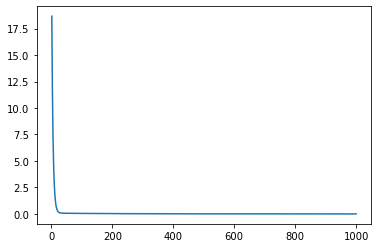

In [41]:
import matplotlib.pyplot as plt

plt.plot(x,y)

# Deeper Look at GD

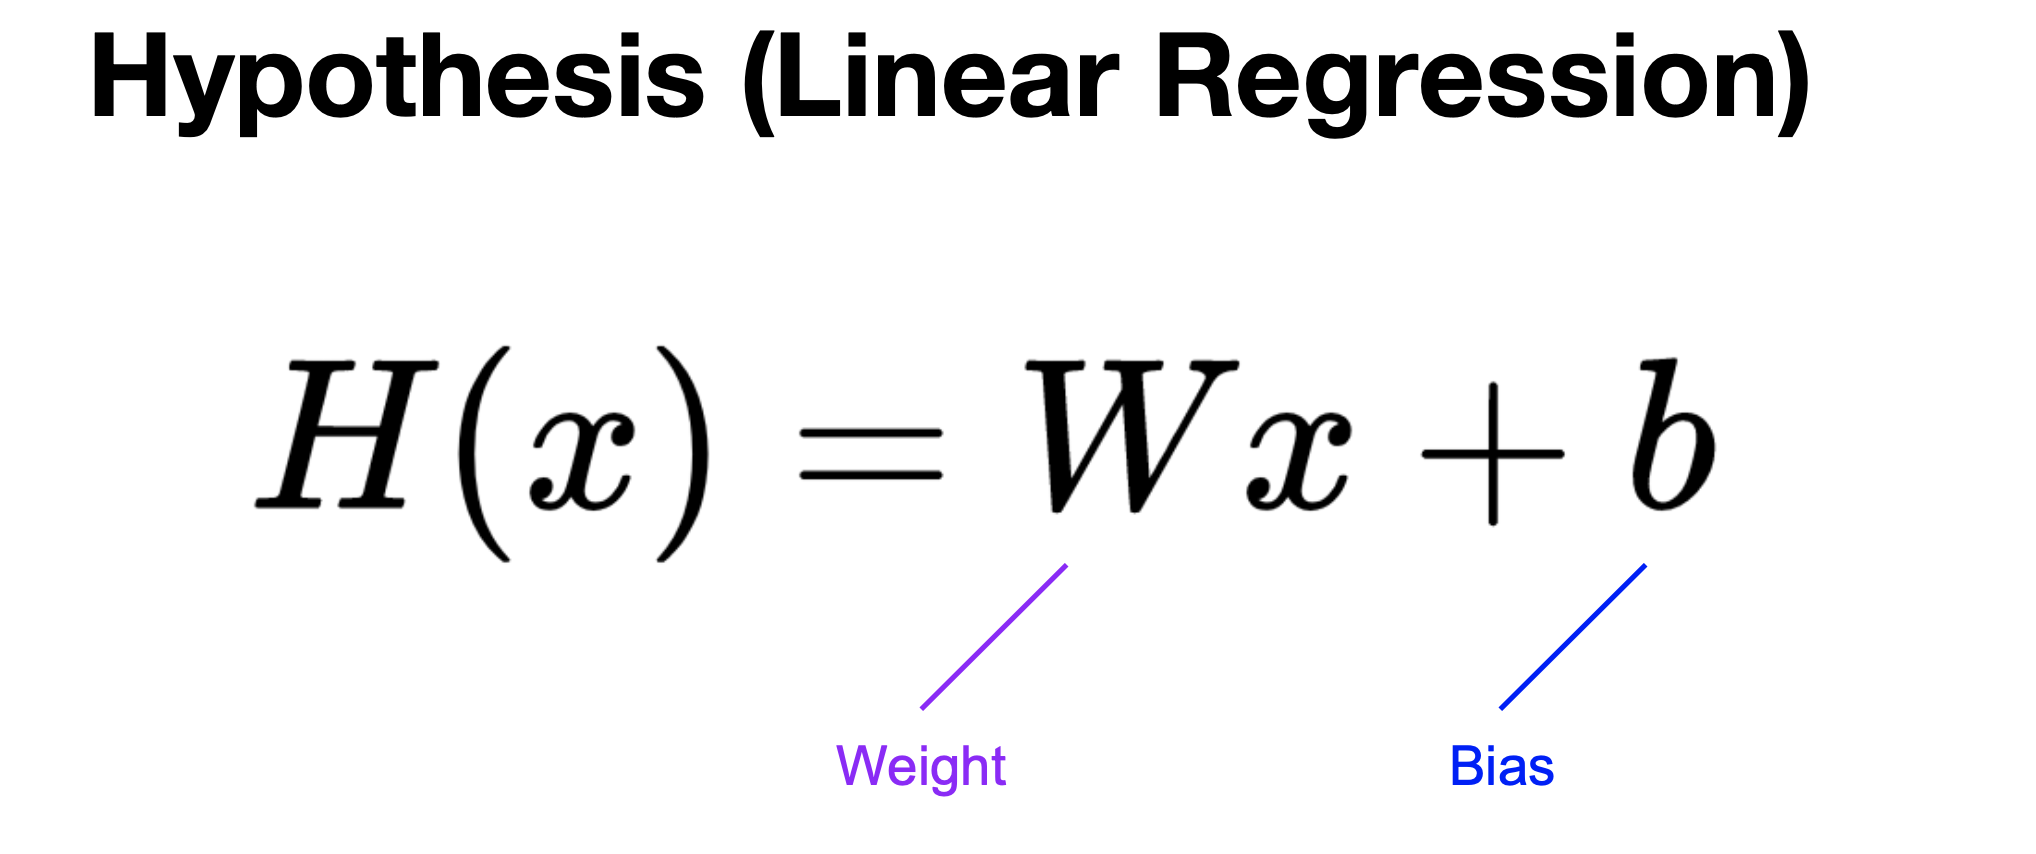

In [44]:
x_train = torch.FloatTensor([[i] for i in range(1,4,1)])
y_train = torch.FloatTensor([[i] for i in range(1,4,1)])

In [56]:
w = torch.zeros(2, requires_grad = True) # zeros가 n개로 주어짐
#b = torch.zeros(1, requires_grad = True)
hypothesis = w*x_train  # broadcasting을 통해서 행렬이 연산됌

# 모델의 좋고 나쁨을 어떻게 평가할 수 있을까?
- Cost function 이용 --> MSE방법을 사용합니다.


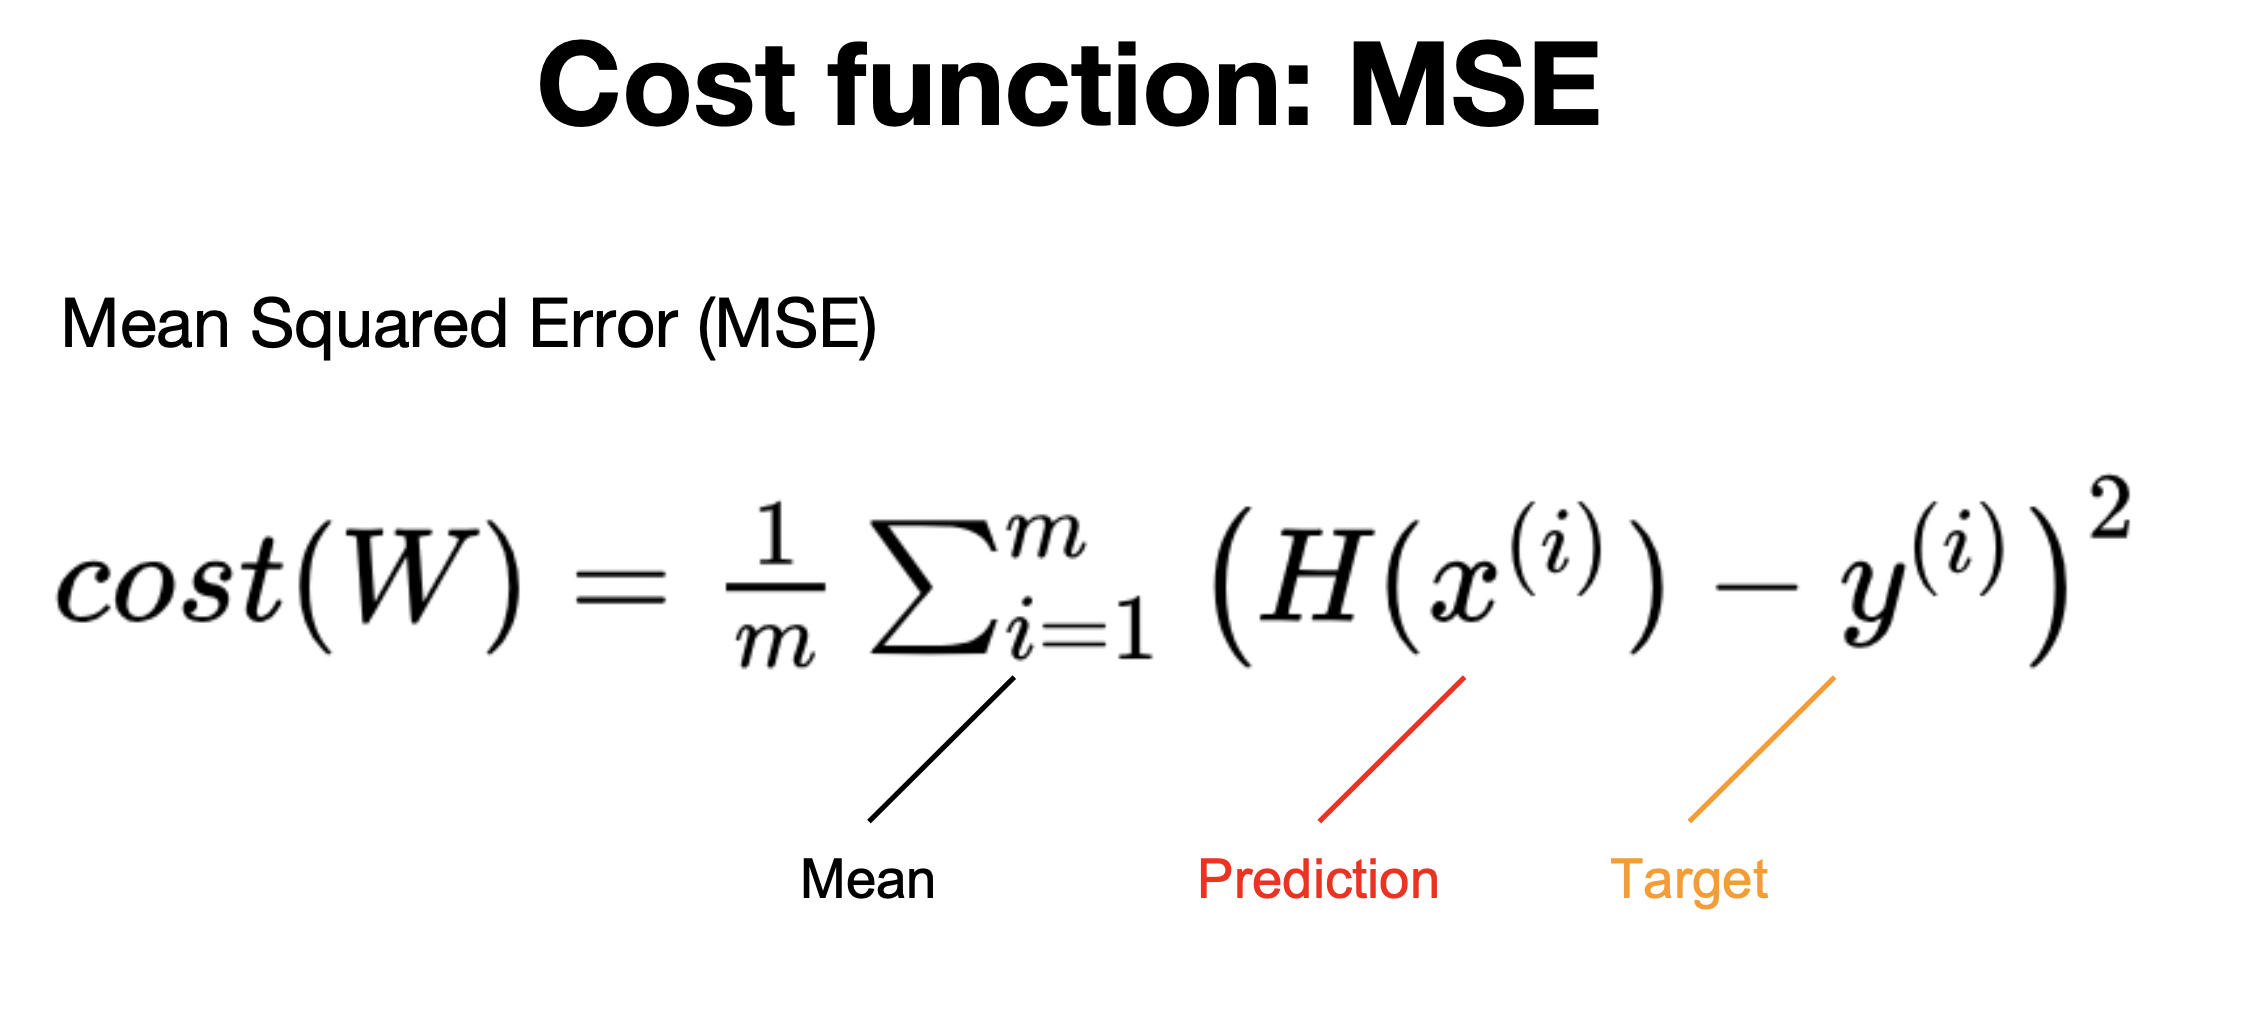

In [64]:
optimizer = optim.SGD([w], lr = 0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [67]:
torch.mean((w*x_train - x_train) ** 2)

tensor(4.6667, grad_fn=<MeanBackward0>)

In [75]:
# 데이터 정의
x_train = torch.FloatTensor([[i] for i in range(1,4)])
y_train = torch.FloatTensor([[i] for i in range(1,4)])

# hypothesis 초기화
w = torch.zeros(1,requires_grad = True)

# optimizer 정의
optimizer = optim.SGD([w], lr = 0.1)


# 학습
n_epochs = 10
for epoch in range(1,n_epochs+1):
    hypothesis = w * x_train
    cost = torch.mean((w*x_train - x_train) ** 2)
    
    print('Epoch {:4d}/{} W: {:.3f} Cost: {:.6f}'.format(epoch, n_epochs, w.item(), cost.item()))
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()


Epoch    1/10 W: 0.000 Cost: 4.666667
Epoch    2/10 W: 0.933 Cost: 0.020741
Epoch    3/10 W: 0.996 Cost: 0.000092
Epoch    4/10 W: 1.000 Cost: 0.000000
Epoch    5/10 W: 1.000 Cost: 0.000000
Epoch    6/10 W: 1.000 Cost: 0.000000
Epoch    7/10 W: 1.000 Cost: 0.000000
Epoch    8/10 W: 1.000 Cost: 0.000000
Epoch    9/10 W: 1.000 Cost: 0.000000
Epoch   10/10 W: 1.000 Cost: 0.000000


# Gradient를 왜 계산하고, 미분은 어떻게 사용되는가? 

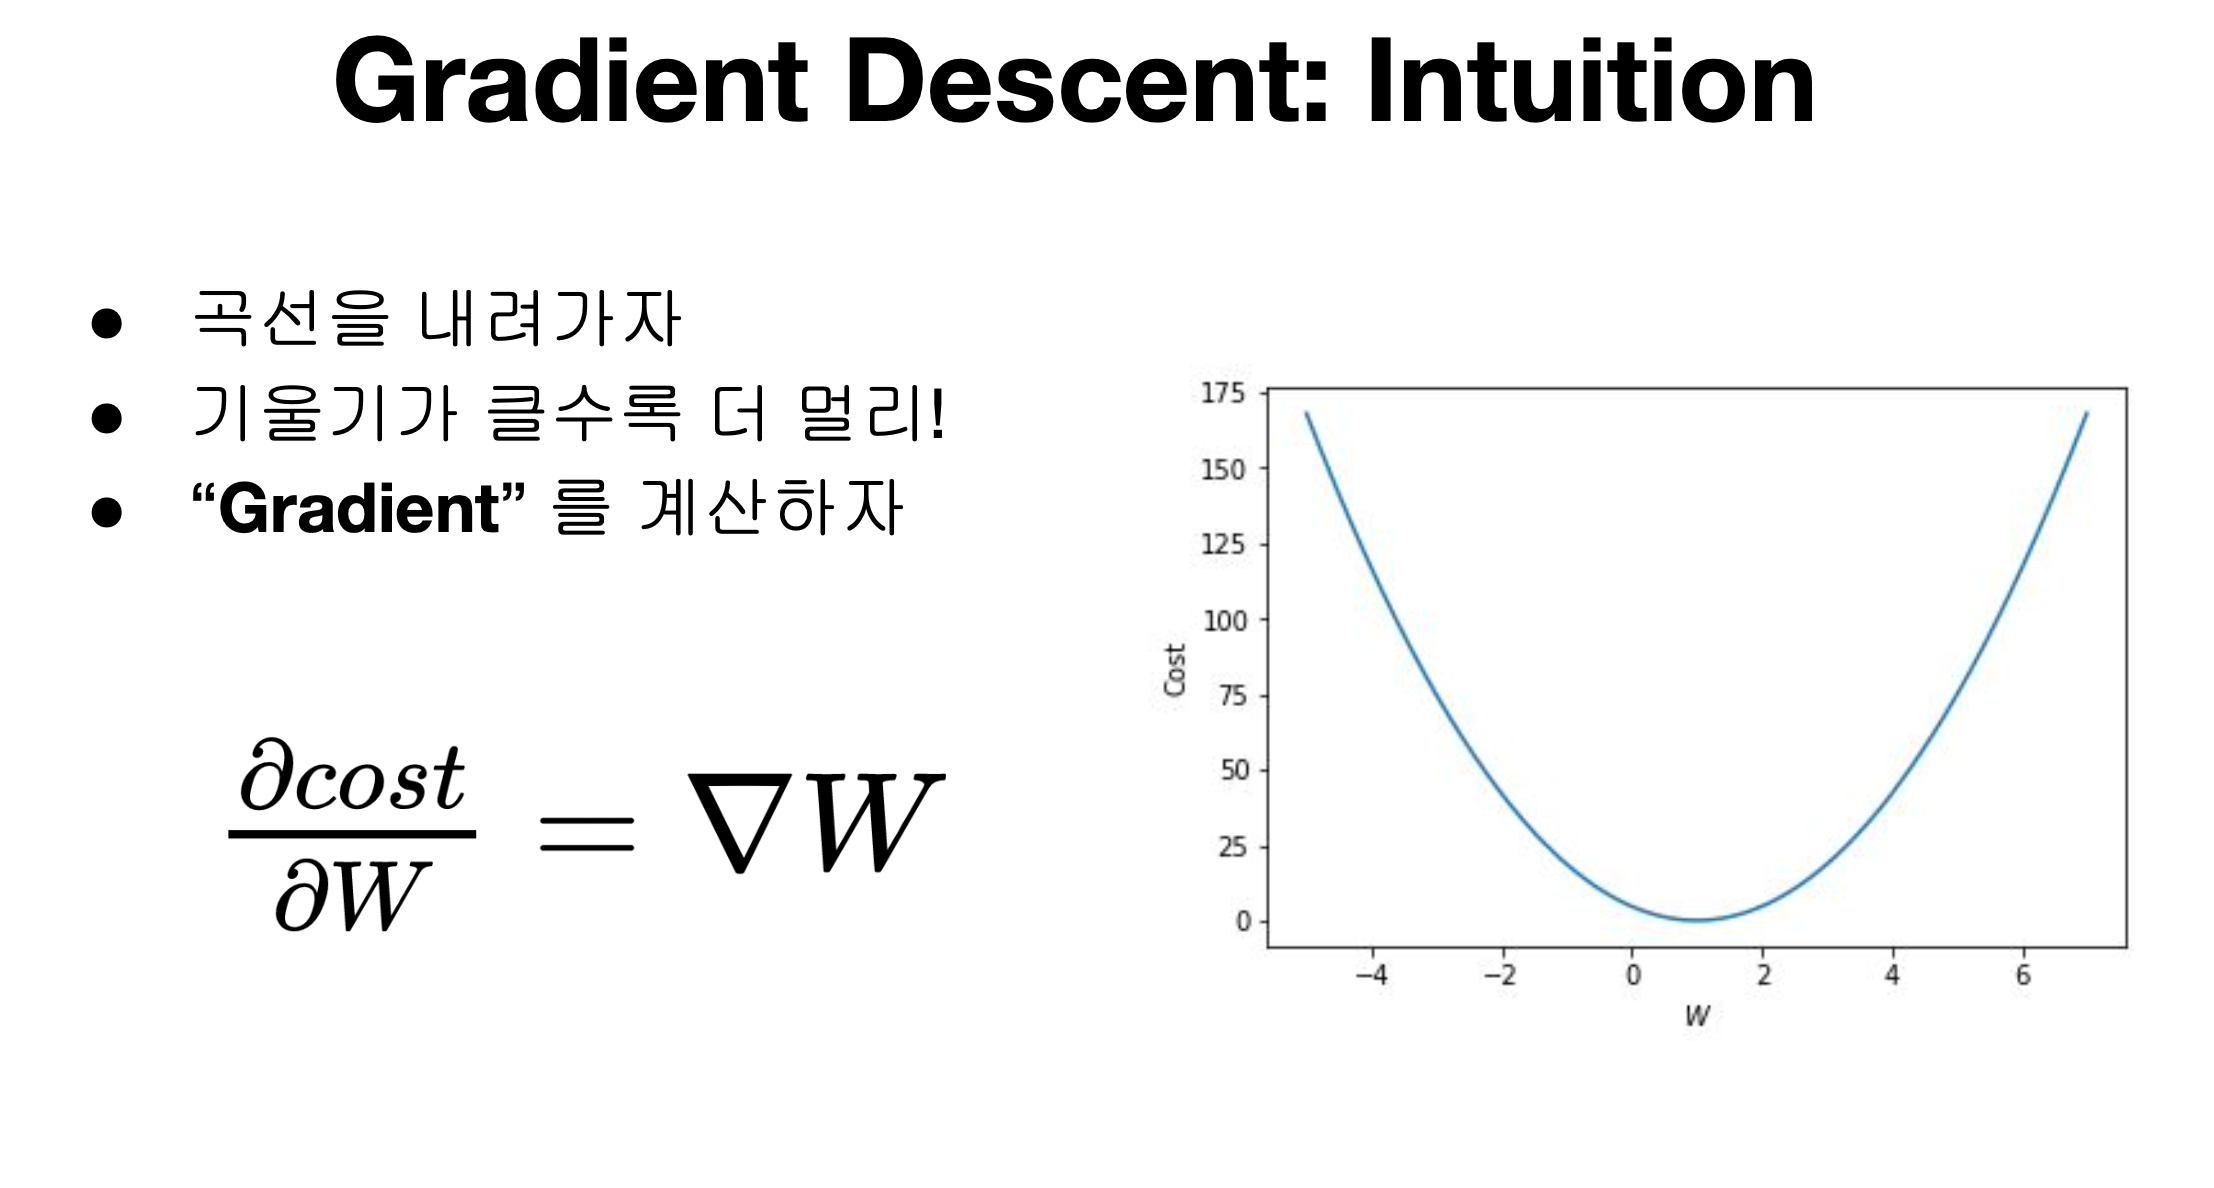

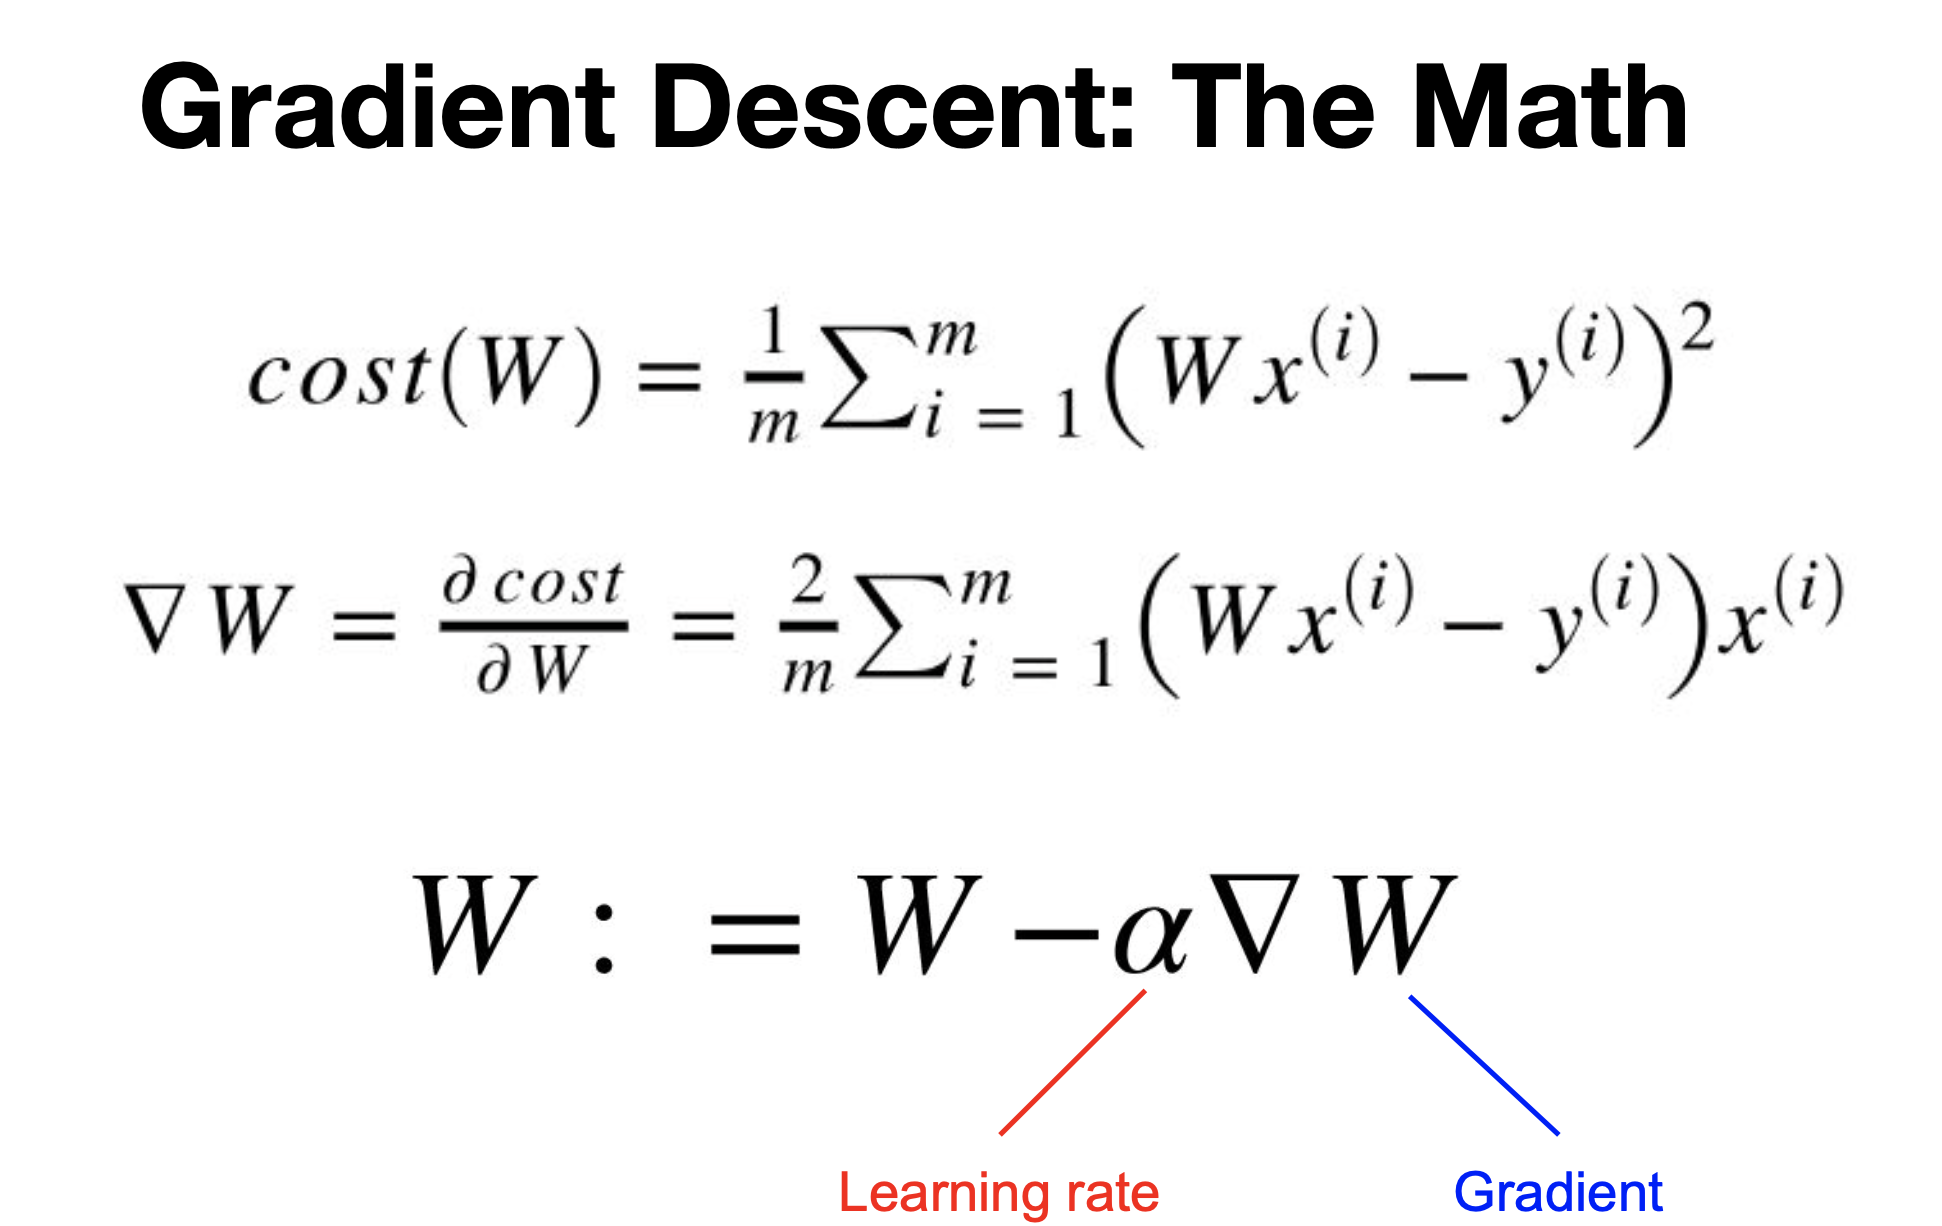

# Multivariate Linear regression
- 다항회귀분석으로 이해하면 되겠다.
- H(x) = X*W + B의 형태의 행렬식으로 표현이 가능하다.

- 현재 쪽지 3개의 시험점수를 통해서 기말고사 성적을 예측하는 neural net을 만들고 있음.

In [117]:
    '''Original version'''
# 데이터
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,60]
                             ])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

# 모델초기화
w = torch.zeros((3,1), requires_grad = True) 
b = torch.zeros((1), requires_grad = True)

# optimizer
optimizer = optim.SGD([w,b], lr = 1e-5)



In [118]:
# 학습
nb_epochs = 20
for epoch in range(1,nb_epochs+1):
    hypothesis = x_train.matmul(w) + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    print('Epoch {:4d}/{} hypothesis: {} \nCost: {:.6f}'.format(epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()))

    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    1/20 hypothesis: tensor([0., 0., 0., 0., 0.]) 
Cost: 29661.800781
Epoch    2/20 hypothesis: tensor([66.8318, 80.3114, 79.1411, 86.1714, 58.3459]) 
Cost: 9489.236328
Epoch    3/20 hypothesis: tensor([104.6124, 125.7127, 123.8805, 134.8848,  91.3309]) 
Cost: 3042.479004
Epoch    4/20 hypothesis: tensor([125.9699, 151.3787, 149.1721, 162.4227, 109.9791]) 
Cost: 982.217590
Epoch    5/20 hypothesis: tensor([138.0432, 165.8881, 163.4696, 177.9898, 120.5225]) 
Cost: 323.791870
Epoch    6/20 hypothesis: tensor([144.8681, 174.0905, 171.5520, 186.7897, 126.4841]) 
Cost: 113.364601
Epoch    7/20 hypothesis: tensor([148.7259, 178.7276, 176.1209, 191.7639, 129.8555]) 
Cost: 46.108650
Epoch    8/20 hypothesis: tensor([150.9064, 181.3490, 178.7036, 194.5755, 131.7627]) 
Cost: 24.607517
Epoch    9/20 hypothesis: tensor([152.1387, 182.8309, 180.1635, 196.1644, 132.8421]) 
Cost: 17.728819
Epoch   10/20 hypothesis: tensor([152.8349, 183.6688, 180.9886, 197.0622, 133.4537]) 
Cost: 15.522946
Epoch

# 위 과정을 nn.Module과 loss function을 이용해보자.

In [122]:
import torch.nn as nn

class MultivaraiteLinearRegressionModle(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1) # 입력의 차원이 3, 출력의 차원이 1
        
    def forward(self,x):
        return self.linear(x)
    

import torch.nn.functional as F

In [135]:
    '''nn.module version'''
# 데이터
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,60]
                             ])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

# 모델초기화
model = MultivaraiteLinearRegressionModle()

# optimizer
optimizer = optim.SGD(model.parameters(), lr = 1e-5)

In [136]:
# train
n_epochs = 10

for epoch in range(1,n_epochs+1):
    hypothesis = model(x_train) # 예측
    cost = F.mse_loss(hypothesis, y_train) # loss 계산
    
    optimizer.zero_grad() # parameter 0으로 바꾸기
    cost.backward() # 미분계산하기
    optimizer.step() # 값 전달하기
    
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(epoch, n_epochs, hypothesis.squeeze().detach(), cost.item()))

    

Epoch    1/10 hypothesis: tensor([-29.9252, -41.0912, -37.8098, -41.9103, -28.3115]) Cost: 43452.472656
Epoch    2/10 hypothesis: tensor([50.9660, 56.1160, 57.9805, 62.3895, 42.3084]) Cost: 13899.575195
Epoch    3/10 hypothesis: tensor([ 96.6944, 111.0688, 112.1319, 121.3512,  82.2322]) Cost: 4455.049805
Epoch    4/10 hypothesis: tensor([122.5447, 142.1346, 142.7442, 154.6825, 104.8030]) Cost: 1436.759033
Epoch    5/10 hypothesis: tensor([137.1577, 159.6968, 160.0495, 173.5247, 117.5640]) Cost: 472.164551
Epoch    6/10 hypothesis: tensor([145.4181, 169.6252, 169.8322, 184.1761, 124.7793]) Cost: 163.889709
Epoch    7/10 hypothesis: tensor([150.0872, 175.2380, 175.3623, 190.1969, 128.8596]) Cost: 65.361916
Epoch    8/10 hypothesis: tensor([152.7262, 178.4112, 178.4883, 193.6001, 131.1676]) Cost: 33.864952
Epoch    9/10 hypothesis: tensor([154.2175, 180.2053, 180.2553, 195.5235, 132.4737]) Cost: 23.789713
Epoch   10/10 hypothesis: tensor([155.0600, 181.2198, 181.2539, 196.6104, 133.2134])

# Loading Data
- 엄청난 양의 데이터를 한번에 학습시키기는 쉽지 않으므로, 데이터를 나누어서 학습을 하자.
- Batch 이용하기

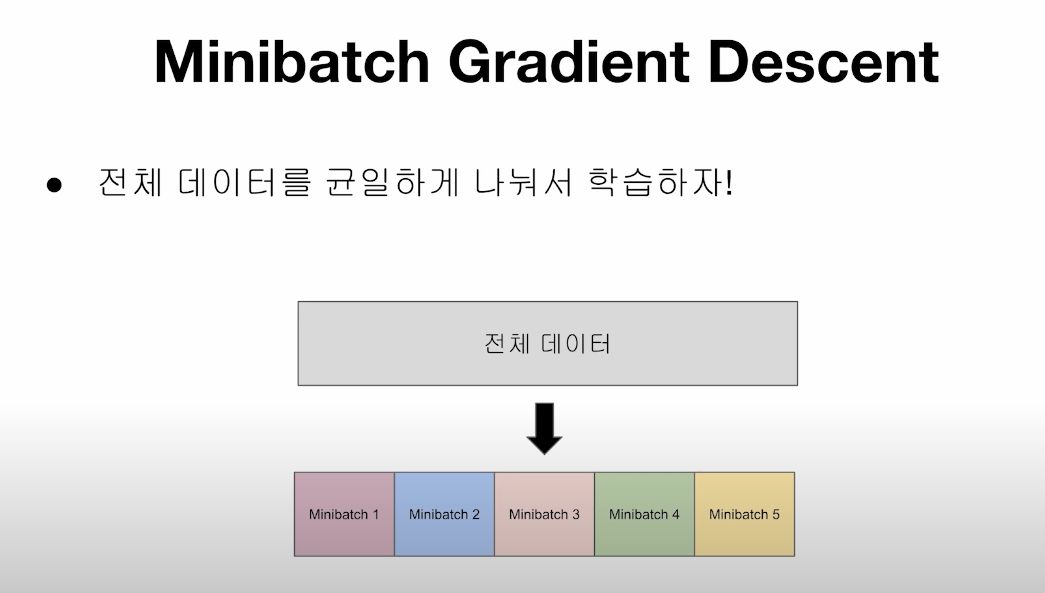

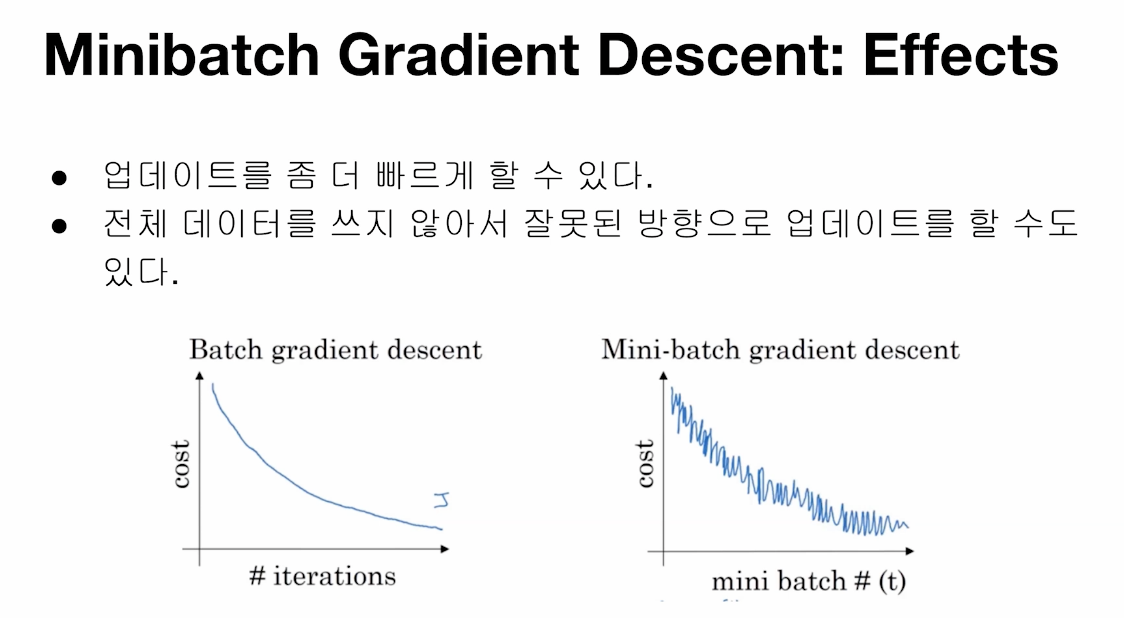

In [140]:
from torch.utils.data import Dataset

# dataset만들기
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73,80,75],
                       [93,88,93],
                       [89,91,90],
                       [96,98,100],
                       [73,66,70]]
        self.y_data = [[152],[185],[180],[196],[142]]
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self,idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x,y
    
dataset = CustomDataset()

In [141]:
# dataloader 만들기
from torch.utils.data import DataLoader
dataloader = DataLoader(
    dataset,
    batch_size = 3,
    shuffle = True
)

In [144]:
#학습 진행하기
nb_epochs = 20
for epoch in range(1,nb_epochs+1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        
        # H(x) 계산
        prediction = model(x_train)
        # loss 계산
        cost = F.mse_loss(prediction, y_train)
        
        #optim 활용
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Batch: {}/{} Cost: {:.6f}'.format(epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item()))

                   

Epoch    1/20 Batch: 1/2 Cost: 5.451570
Epoch    1/20 Batch: 2/2 Cost: 18.839310
Epoch    2/20 Batch: 1/2 Cost: 10.650259
Epoch    2/20 Batch: 2/2 Cost: 6.101207
Epoch    3/20 Batch: 1/2 Cost: 8.926505
Epoch    3/20 Batch: 2/2 Cost: 7.930223
Epoch    4/20 Batch: 1/2 Cost: 10.403346
Epoch    4/20 Batch: 2/2 Cost: 5.595368
Epoch    5/20 Batch: 1/2 Cost: 6.602900
Epoch    5/20 Batch: 2/2 Cost: 10.638720
Epoch    6/20 Batch: 1/2 Cost: 6.224084
Epoch    6/20 Batch: 2/2 Cost: 17.962015
Epoch    7/20 Batch: 1/2 Cost: 6.321627
Epoch    7/20 Batch: 2/2 Cost: 14.886547
Epoch    8/20 Batch: 1/2 Cost: 12.811191
Epoch    8/20 Batch: 2/2 Cost: 3.294153
Epoch    9/20 Batch: 1/2 Cost: 6.642868
Epoch    9/20 Batch: 2/2 Cost: 10.819358
Epoch   10/20 Batch: 1/2 Cost: 4.851718
Epoch   10/20 Batch: 2/2 Cost: 19.236217
Epoch   11/20 Batch: 1/2 Cost: 11.237148
Epoch   11/20 Batch: 2/2 Cost: 5.126586
Epoch   12/20 Batch: 1/2 Cost: 7.930175
Epoch   12/20 Batch: 2/2 Cost: 16.396189
Epoch   13/20 Batch: 1/2 Cost

# 느낀점 정리
- 처음 모두를 위한 딥러닝 시즌1을 들었을 때는 정말 아무것도 몰랐던 것 같다. 그렇지만 회귀분석, 딥러닝 기초 내용을 이해하고, 모바일 앱 개발로 이런저런 구글링 하는 실력을 길러나간 지금, 들을 귀가 생긴 것 같아서 정말 뿌듯하다.

- nn.Module을 상속하는 class를 정의해서 우리가 원하는 모델을 만들 수 있다.
- optim과 loss function을 정의해야 한다.

- 사용자정의 dataset을 위한 class를 만들 수 있는데, 이때 __getitem__ , __len__ 과 같은 함수들이 만들어져야 한다.
- Dataloader를 만들어서 torch에서 학습이 가능하게 해야한다. 이때 dataset, batch_size, shuffle등이 parameter로 사용된다.
- 